# Presequite

In [ ]:
!wget -O /home/conn.log.gz https://raw.githubusercontent.com/un5eeny0t/UMCS-notebook/main/conn.log.gz


--2025-05-17 04:03:13--  https://raw.githubusercontent.com/un5eeny0t/UMCS-notebook/main/conn.log.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36269 (35K) [application/octet-stream]
Saving to: ‘/home/conn.log.gz’

/home/conn.log.gz   100%[===================>]  35.42K  --.-KB/s    in 0.01s   

2025-05-17 04:03:13 (3.24 MB/s) - ‘/home/conn.log.gz’ saved [36269/36269]



# Zeek Log Analysis in Colab





**Install Dependencies**

---



In [ ]:
# Install any necessary packages
!pip install pandas matplotlib



**This code defines a function load_zeek_log that loads Zeek log files (compressed or plain text) into a pandas DataFrame, extracting headers from the #fields line and data from non-comment lines.**

---



In [ ]:
import pandas as pd
import gzip
from io import StringIO

def load_zeek_log(filepath):
    # Automatically handle .gz files
    open_func = gzip.open if filepath.endswith('.gz') else open

    with open_func(filepath, 'rt') as file:
        lines = file.readlines()

    # Extract header line
    header_line = next((line for line in lines if line.startswith('#fields')), None)
    if not header_line:
        raise ValueError("No #fields line found in Zeek log")

    headers = header_line.strip().split()[1:]  # Remove '#fields'

    # Extract data lines
    data_lines = [line for line in lines if not line.startswith('#')]

    # Load into DataFrame
    return pd.read_csv(StringIO(''.join(data_lines)), sep='\t', names=headers)


**This code loads the Zeek connection log (conn.log.gz) into a pandas DataFrame using the load_zeek_log function and displays the first few rows of the DataFrame with head().**

---



In [ ]:
conn_df = load_zeek_log("/home/conn.log.gz")
conn_df.head()


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,ip_proto
0,1.737575e+09,C7lr59wYmejVUMeTa,10.1.17.215,50084,10.1.17.2,389,tcp,ldap_tcp,0.003811,2229,...,T,T,0,ShADadrF,6,2481,4,382,-,6
1,1.737575e+09,CO6a1nR0vlcmalEv7,10.1.17.215,50087,23.220.102.9,80,tcp,http,0.096900,111,...,T,F,0,ShADadfF,5,323,5,399,-,6
2,1.737575e+09,Cm41h340Ek9jaJKmG9,10.1.17.215,50086,52.156.123.84,443,tcp,ssl,0.497973,673,...,T,F,0,ShADdaFfR,13,1205,10,3620,-,6
3,1.737575e+09,Cw0aO42aIznBtWOcTb,10.1.17.215,57386,10.1.17.2,53,udp,dns,0.000358,89,...,T,T,0,Dd,1,117,1,188,-,17
4,1.737575e+09,CIUe7V2CFJKnMWkt2b,10.1.17.215,56330,224.0.0.252,5355,udp,dns,0.409832,66,...,T,F,0,D,2,122,0,0,-,17


# Basic analysis

---



# Top 10 source IPs

**Counts the occurrences of unique values in the id.orig_h column (which likely represents the original host IP addresses) of the conn_df DataFrame and displays the top 10 most frequent values.**

---



In [ ]:
conn_df['id.orig_h'].value_counts().head(10)


,count
id.orig_h,
10.1.17.215,854
169.254.168.209,3
0.0.0.0,1
10.1.17.2,1


# Top Destination Ports

**Counts the occurrences of unique values in the id.resp_p column (which likely represents the response port numbers) of the conn_df DataFrame and displays the top 10 most frequent values.**

---



In [ ]:
conn_df['id.resp_p'].value_counts().head(10)


,count
id.resp_p,
53,321
443,246
389,80
135,29
49668,28
123,28
88,25
137,23
80,19


# Most Frequent Protocols

**Counts the occurrences of unique values in the proto column (which represents the protocol used, such as TCP, UDP, etc.) of the conn_df DataFrame and displays the counts for each protocol.**

---



In [ ]:
conn_df['proto'].value_counts()


,count
proto,
udp,430
tcp,423
icmp,6


Plot Traffic Volume

 **Creates a bar chart that visualizes the frequency of each unique value in the proto column (representing network protocols like TCP, UDP, etc.) of the conn_df DataFrame using pandas' built-in plotting functionality.**


---



<Axes: xlabel='proto'>

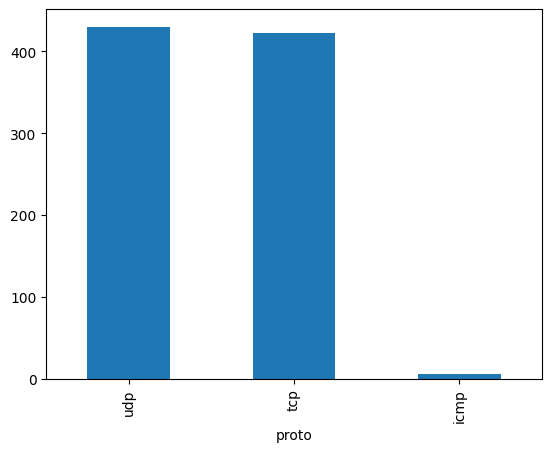

In [ ]:
conn_df['proto'].value_counts().plot(kind='bar')


**Defines a function load_zeek_log to load a gzipped Zeek log file (conn.log.gz), read its content line by line, and return the lines as a list. Then, it loads the log file and prints the first 10 lines of the file for preview.**

---



In [ ]:
import gzip

# Load gzipped Zeek log file
def load_zeek_log(file_path):
    with gzip.open(file_path, 'rt') as f:  # 'rt' = read text mode
        lines = f.readlines()
    return lines

# Load the conn.log.gz
log_lines = load_zeek_log("/home/conn.log.gz")

# Preview the first 10 lines
for line in log_lines[:10]:
    print(line.strip())


#separator \x09
#set_separator	,
#empty_field	(empty)
#unset_field	-
#path	conn
#open	2025-04-29-09-20-41
#fields	ts	uid	id.orig_h	id.orig_p	id.resp_h	id.resp_p	proto	service	duration	orig_bytes	resp_bytes	conn_state	local_orig	local_resp	missed_bytes	history	orig_pkts	orig_ip_bytes	resp_pkts	resp_ip_bytes	tunnel_parents	ip_proto
#types	time	string	addr	port	addr	port	enum	string	interval	count	count	string	bool	bool	count	string	count	count	count	count	set[string]	count
1737575096.656843	C7lr59wYmejVUMeTa	10.1.17.215	50084	10.1.17.2	389	tcp	ldap_tcp	0.003811	2229	210	RSTR	T	T	0	ShADadrF	6	2481	4	382	-	6
1737575101.364101	CO6a1nR0vlcmalEv7	10.1.17.215	50087	23.220.102.9	80	tcp	http	0.096900	111	187	SF	T	F	0	ShADadfF	5	323	5	399	-	6


**Defines a function parse_zeek_log that parses a list of Zeek log lines, extracts the column names from the #fields line, skips comment lines, and creates a pandas DataFrame with the log data. It then parses the conn.log content (log_lines) and displays the first few rows of the resulting DataFrame.**

---



In [ ]:
import pandas as pd

def parse_zeek_log(lines):
    columns = []
    data = []
    for line in lines:
        if line.startswith('#fields'):
            columns = line.strip().split('\t')[1:]  # Skip '#fields'
        elif line.startswith('#'):
            continue  # Skip other comment lines
        else:
            data.append(line.strip().split('\t'))
    return pd.DataFrame(data, columns=columns)

# Parse conn.log
df = parse_zeek_log(log_lines)

# Show the DataFrame
df.head()


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,ip_proto
0,1737575096.656843,C7lr59wYmejVUMeTa,10.1.17.215,50084,10.1.17.2,389,tcp,ldap_tcp,0.003811,2229,...,T,T,0,ShADadrF,6,2481,4,382,-,6
1,1737575101.364101,CO6a1nR0vlcmalEv7,10.1.17.215,50087,23.220.102.9,80,tcp,http,0.096900,111,...,T,F,0,ShADadfF,5,323,5,399,-,6
2,1737575101.022925,Cm41h340Ek9jaJKmG9,10.1.17.215,50086,52.156.123.84,443,tcp,ssl,0.497973,673,...,T,F,0,ShADdaFfR,13,1205,10,3620,-,6
3,1737575096.544983,Cw0aO42aIznBtWOcTb,10.1.17.215,57386,10.1.17.2,53,udp,dns,0.000358,89,...,T,T,0,Dd,1,117,1,188,-,17
4,1737575096.545732,CIUe7V2CFJKnMWkt2b,10.1.17.215,56330,224.0.0.252,5355,udp,dns,0.409832,66,...,T,F,0,D,2,122,0,0,-,17


**Generates a bar chart that visualizes the top 10 source IP addresses (id.orig_h) from the df DataFrame by their count. The chart is displayed with a title, axis labels, and rotated x-axis labels for better readability. The plot uses matplotlib to create and display the graph.**


---



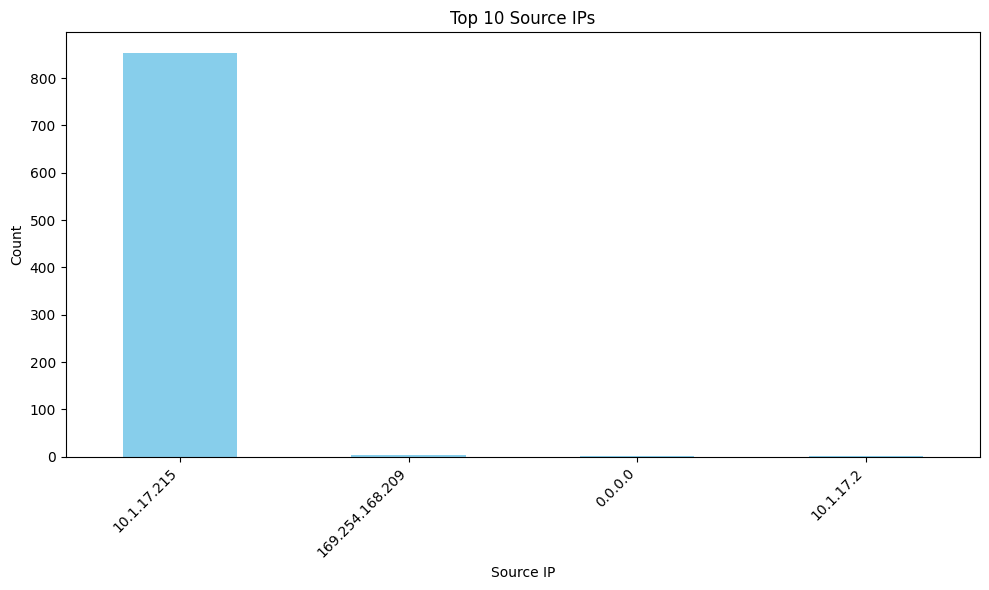

In [ ]:
import matplotlib.pyplot as plt

# Plot top 10 source IPs by count
top_ips = df['id.orig_h'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_ips.plot(kind='bar', color='skyblue')
plt.title('Top 10 Source IPs')
plt.xlabel('Source IP')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Generates a bar chart that shows the distribution of connection states (conn_state) from the df DataFrame. It plots the count of each unique connection state, with a title, axis labels, and rotated x-axis labels for clarity. The plot uses matplotlib to display the results.**

---



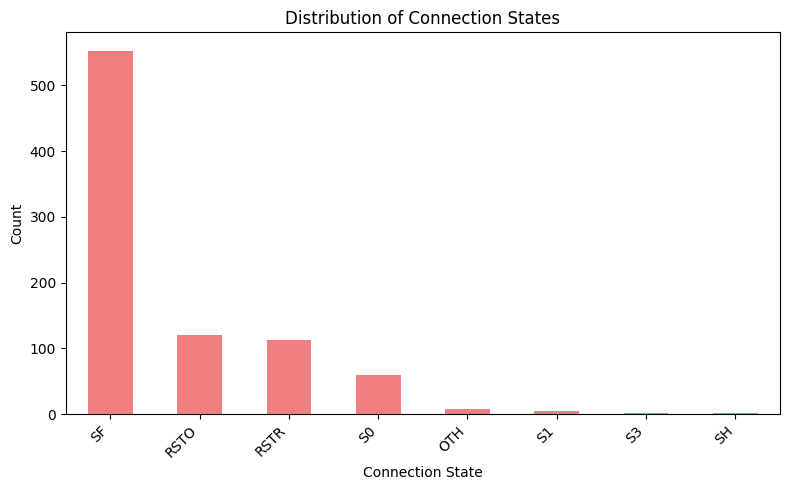

In [ ]:
# Plot distribution of connection states
plt.figure(figsize=(8, 5))
df['conn_state'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Connection States')
plt.xlabel('Connection State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Threat Hunting


---



In [ ]:
import requests
from zipfile import ZipFile

# === Step 1: Download the ZIP file ===

# URL of the malware traffic capture
URL = "https://www.malware-traffic-analysis.net/2022/01/03/2022-01-03-three-days-of-server-probes-including-log4j-attempts.pcap.zip"

# Path to save the downloaded ZIP file
OUTPUT = "/home/malware-pcap.zip"

# Send GET request with streaming enabled
response = requests.get(URL, stream=True)

# Download and write to file if response is good
if response.status_code == 200:
    size_kb = int(response.headers.get("Content-Length", 0)) / 1024
    print(f"Download good, writing {size_kb:.0f} KBytes to {OUTPUT}")

    with open(OUTPUT, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print("Download complete.")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

# === Step 2: Unzip the file with password ===

try:
    with ZipFile(OUTPUT, "r") as zip_ref:
        zip_ref.extractall(path="/home", pwd="infected_20220103".encode("utf-8"))
        print("Extraction complete.")
except RuntimeError as e:
    print(f"Failed to extract ZIP file: {e}")


Download good, writing 1255 KBytes to /home/malware-pcap.zip
Download complete.
Extraction complete.


In [ ]:
!sudo add-apt-repository ppa:oisf/suricata-stable -y
!sudo apt update
!sudo apt install -y suricata
!suricata --version

Repository: 'deb https://ppa.launchpadcontent.net/oisf/suricata-stable/ubuntu/ jammy main'
Description:
Suricata IDS/IPS/NSM stable packages
https://suricata.io/
https://oisf.net/

Suricata IDS/IPS/NSM - Suricata is a high performance Intrusion Detection and Prevention System and Network Security Monitoring engine.

Open Source and owned by a community run non-profit foundation, the Open Information Security Foundation (OISF). Suricata is developed by the OISF, its supporting vendors and the community.

This Engine supports:

- Multi-Threading - provides for extremely fast and flexible operation on multicore systems.
- Multi Tenancy - Per vlan/Per interface
- Uses Rust for most protocol detection/parsing
- TLS/SSL certificate matching/logging
- JA3 TLS client fingerprinting
- JA3S TLS server fingerprinting
- IEEE 802.1ad (QinQ) and IEEE 802.1Q (VLAN) support
- VXLAN support
- All JSON output/logging capability
- IDS runmode
- IPS runmode
- IDPS runmode
- NSM runmode
- eBPF/XDP
- Automa

In [ ]:
!suricata-update
!suricata --version
!suricata-update list-sources
!suricata-update enable-source tgreen/hunting

16/5/2025 -- 06:57:38 - <Info> -- Using data-directory /var/lib/suricata.
16/5/2025 -- 06:57:38 - <Info> -- Using Suricata configuration /etc/suricata/suricata.yaml
16/5/2025 -- 06:57:38 - <Info> -- Using /usr/share/suricata/rules for Suricata provided rules.
16/5/2025 -- 06:57:38 - <Info> -- Found Suricata version 7.0.10 at /usr/bin/suricata.
16/5/2025 -- 06:57:38 - <Info> -- Loading /etc/suricata/suricata.yaml
16/5/2025 -- 06:57:38 - <Info> -- Disabling rules for protocol pgsql
16/5/2025 -- 06:57:38 - <Info> -- Disabling rules for protocol modbus
16/5/2025 -- 06:57:38 - <Info> -- Disabling rules for protocol dnp3
16/5/2025 -- 06:57:38 - <Info> -- Disabling rules for protocol enip
16/5/2025 -- 06:57:38 - <Info> -- No sources configured, will use Emerging Threats Open
16/5/2025 -- 06:57:38 - <Info> -- Fetching https://rules.emergingthreats.net/open/suricata-7.0.10/emerging.rules.tar.gz.
   0% - 8192/4924830                     0% - 16384/4924830   

In [ ]:
LOGDIR = "/tmp/logs"

In [ ]:
!rm -rf $LOGDIR && $mkdir $LOGDIR && ls -lah $LOGDIR

total 16K
drwxr-xr-x 1 root root 4.0K May 14 13:38 .
drwxr-xr-x 1 root root 4.0K May 16 06:51 ..
drwxr-xr-x 4 root root 4.0K May 14 13:38 .config
drwxr-xr-x 1 root root 4.0K May 14 13:38 sample_data


In [ ]:
!mkdir -p /tmp/logs

In [ ]:
LOG4J_PCAP = "/home/2022-01-03-three-days-of-server-probes-including-log4j-attempts.pcap"

In [ ]:
!whereis suricata

suricata: /usr/bin/suricata /usr/lib/suricata /etc/suricata /usr/share/suricata


In [ ]:
!/usr/bin/suricata -S /var/lib/suricata/rules/suricata.rules -l $LOGDIR -r $LOG4J_PCAP -v

Notice: suricata: This is Suricata version 7.0.10 RELEASE running in USER mode
Info: cpu: CPUs/cores online: 2
Info: suricata: Setting engine mode to IDS mode by default
Info: exception-policy: master exception-policy set to: auto
Info: logopenfile: fast output device (regular) initialized: fast.log
Info: logopenfile: eve-log output device (regular) initialized: eve.json
Info: logopenfile: stats output device (regular) initialized: stats.log
Info: detect: 1 rule files processed. 43507 rules successfully loaded, 0 rules failed, 0
Info: threshold-config: Threshold config parsed: 0 rule(s) found
Info: detect: 43510 signatures processed. 1231 are IP-only rules, 4346 are inspecting packet payload, 37715 inspect application layer, 109 are decoder event only
Info: pcap: Starting file run for /home/2022-01-03-three-days-of-server-probes-including-log4j-attempts.pcap
Info: checksum: No packets with invalid checksum, assuming checksum offloading is NOT used
Notice: threads: Threads created -> RX

In [ ]:
import json

In [ ]:
with open ("/tmp/logs/eve.json", "r") as handle:
  handle.readline ()
  for line in handle:
    eve = json.loads (line)
    if eve.get ("event_type", "") == "alert" and eve.get("alert", {}).get("severity") == 1:
      print (json.dumps(eve, indent=2) )
      break

{
  "timestamp": "2022-01-01T19:05:52.130715+0000",
  "flow_id": 2151510414328110,
  "pcap_cnt": 10350,
  "event_type": "alert",
  "src_ip": "186.220.97.233",
  "src_port": 4873,
  "dest_ip": "198.71.247.91",
  "dest_port": 80,
  "proto": "TCP",
  "pkt_src": "wire/pcap",
  "metadata": {
    "flowints": {
      "tcp.retransmission.count": 1
    }
  },
  "tx_id": 0,
  "alert": {
    "action": "allowed",
    "gid": 1,
    "signature_id": 2029022,
    "rev": 3,
    "signature": "ET SCAN Mirai Variant User-Agent (Inbound)",
    "category": "Attempted Administrator Privilege Gain",
    "severity": 1,
    "metadata": {
      "affected_product": [
        "Linux"
      ],
      "attack_target": [
        "IoT"
      ],
      "confidence": [
        "High"
      ],
      "created_at": [
        "2019_11_21"
      ],
      "deployment": [
        "Perimeter"
      ],
      "signature_severity": [
        "Minor"
      ],
      "updated_at": [
        "2020_10_29"
      ]
    }
  },
  "http": {
 

In [ ]:
%pip install pandas

In [ ]:
import pandas as pd

pd.options.display.html.use_mathjax = False

pd.DataFrame ( [{"src_ip": "1.1.1.1", "flow_id": 123}, {"src_ip": "2.2.2.2", "flow_id": 124}])

,src_ip,flow_id
0,1.1.1.1,123
1,2.2.2.2,124


In [ ]:
with open ("/tmp/logs/eve.json", "r") as handle:
  DF = pd. json_normalize ([
  json. loads (line) for line in handle

])

DF

,timestamp,flow_id,pcap_cnt,event_type,src_ip,src_port,dest_ip,dest_port,proto,pkt_src,...,stats.app_layer.error.krb5_udp.parser,stats.app_layer.error.krb5_udp.internal,stats.app_layer.expectations,stats.memcap_pressure,stats.memcap_pressure_max,stats.http.memuse,stats.http.memcap,stats.ftp.memuse,stats.ftp.memcap,stats.file_store.open_files
0,2022-01-01T00:01:49.092097+0000,1.521455e+15,18.0,dns,209.141.58.15,35550.0,198.71.247.91,53.0,UDP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01T00:04:26.529009+0000,7.368406e+14,34.0,http,64.225.75.232,33556.0,198.71.247.91,80.0,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01T00:04:26.529078+0000,7.368406e+14,36.0,fileinfo,198.71.247.91,80.0,64.225.75.232,33556.0,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01T00:05:53.595328+0000,5.277827e+14,57.0,http,219.84.187.214,56903.0,198.71.247.91,80.0,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01T00:05:51.487413+0000,2.093423e+15,50.0,sip,193.46.255.60,5103.0,198.71.247.91,5060.0,UDP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25870,2022-01-01T00:00:13.076985+0000,4.387580e+13,NaN,flow,139.224.50.39,38002.0,198.71.247.91,8083.0,UDP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25871,2022-01-01T00:00:13.076985+0000,1.260566e+14,NaN,flow,146.88.240.4,46492.0,198.71.247.91,111.0,UDP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25872,2022-01-01T00:00:13.076985+0000,1.861280e+15,NaN,flow,71.6.233.153,17185.0,198.71.247.91,17185.0,UDP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25873,2022-01-01T00:00:13.076985+0000,6.436020e+14,NaN,flow,198.71.247.91,51018.0,91.189.91.157,123.0,UDP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
DF.shape

(25875, 574)

In [ ]:
print("dataframe has %d rows and %d columns" % DF.shape)

dataframe has 25875 rows and 574 columns


In [ ]:
COLS_STATS = [c for c in list (DF.columns.values) if c.startswith("stats") ]
len(COLS_STATS)

444

In [ ]:
print ("%d stats cols from total %d" % (len (COLS_STATS), len (DF.columns.values) ) )

444 stats cols from total 574


In [ ]:
COLS_DATA = [c for c in list (DF.columns.values) if not c.startswith ("stats") ]
print ("%d data columns" % len (COLS_DATA) )

130 data columns


In [ ]:
DF[COLS_DATA]

,timestamp,flow_id,pcap_cnt,event_type,src_ip,src_port,dest_ip,dest_port,proto,pkt_src,...,files,app_proto_ts,metadata.flowints.http.anomaly.count,krb5.msg_type,krb5.cname,krb5.realm,krb5.sname,krb5.encryption,krb5.weak_encryption,metadata.flowbits
0,2022-01-01T00:01:49.092097+0000,1.521455e+15,18.0,dns,209.141.58.15,35550.0,198.71.247.91,53.0,UDP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01T00:04:26.529009+0000,7.368406e+14,34.0,http,64.225.75.232,33556.0,198.71.247.91,80.0,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01T00:04:26.529078+0000,7.368406e+14,36.0,fileinfo,198.71.247.91,80.0,64.225.75.232,33556.0,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01T00:05:53.595328+0000,5.277827e+14,57.0,http,219.84.187.214,56903.0,198.71.247.91,80.0,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01T00:05:51.487413+0000,2.093423e+15,50.0,sip,193.46.255.60,5103.0,198.71.247.91,5060.0,UDP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25870,2022-01-01T00:00:13.076985+0000,4.387580e+13,NaN,flow,139.224.50.39,38002.0,198.71.247.91,8083.0,UDP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25871,2022-01-01T00:00:13.076985+0000,1.260566e+14,NaN,flow,146.88.240.4,46492.0,198.71.247.91,111.0,UDP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25872,2022-01-01T00:00:13.076985+0000,1.861280e+15,NaN,flow,71.6.233.153,17185.0,198.71.247.91,17185.0,UDP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25873,2022-01-01T00:00:13.076985+0000,6.436020e+14,NaN,flow,198.71.247.91,51018.0,91.189.91.157,123.0,UDP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
DF.describe()

,flow_id,pcap_cnt,src_port,dest_port,dns.version,dns.id,dns.tx_id,dns.opcode,tx_id,http.status,...,stats.app_layer.error.krb5_udp.parser,stats.app_layer.error.krb5_udp.internal,stats.app_layer.expectations,stats.memcap_pressure,stats.memcap_pressure_max,stats.http.memuse,stats.http.memcap,stats.ftp.memuse,stats.ftp.memcap,stats.file_store.open_files
count,2.587400e+04,2741.000000,23508.000000,23508.000000,59.0,59.000000,59.000000,59.0,1208.000000,2415.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1.137101e+15,21704.767968,42150.968819,14508.816318,2.0,25804.694915,0.203390,0.0,4.306291,352.883644,...,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0
std,6.467206e+14,12314.294751,17973.429173,17818.938579,0.0,22754.924353,0.517942,0.0,7.517154,88.335141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.936220e+09,18.000000,17.000000,2.000000,2.0,1.000000,0.000000,0.0,0.000000,200.000000,...,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0
25%,5.888732e+14,10651.000000,36118.250000,1723.000000,2.0,5463.000000,0.000000,0.0,0.000000,252.000000,...,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0
50%,1.130943e+15,23272.000000,48856.000000,7001.000000,2.0,16765.000000,0.000000,0.0,0.000000,404.000000,...,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0
75%,1.695232e+15,33740.000000,54823.000000,22038.000000,2.0,43119.000000,0.000000,0.0,7.000000,404.000000,...,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0
max,2.251780e+15,39193.000000,65531.000000,65528.000000,2.0,64206.000000,2.000000,0.0,41.000000,408.000000,...,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
DF.head()

,timestamp,flow_id,pcap_cnt,event_type,src_ip,src_port,dest_ip,dest_port,proto,pkt_src,...,stats.app_layer.error.krb5_udp.parser,stats.app_layer.error.krb5_udp.internal,stats.app_layer.expectations,stats.memcap_pressure,stats.memcap_pressure_max,stats.http.memuse,stats.http.memcap,stats.ftp.memuse,stats.ftp.memcap,stats.file_store.open_files
0,2022-01-01T00:01:49.092097+0000,1.521454e+15,18.0,dns,209.141.58.15,35550.0,198.71.247.91,53.0,UDP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01T00:04:26.529009+0000,7.368426e+14,34.0,http,64.225.75.232,33556.0,198.71.247.91,80.0,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01T00:04:26.529078+0000,7.368426e+14,36.0,fileinfo,198.71.247.91,80.0,64.225.75.232,33556.0,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01T00:05:51.487413+0000,2.093425e+15,50.0,sip,193.46.255.60,5103.0,198.71.247.91,5060.0,UDP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01T00:00:13.076985+0000,1.777836e+15,NaN,flow,178.175.173.166,43719.0,198.71.247.91,23.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for col in ["src_port", "dest_port", "pcap_cnt"]:
  DF[col] = (
      DF[col]
      .fillna (0)
      .astype (int)
  )

In [ ]:
DF["timestamp"] = pd.to_datetime(DF["timestamp"])

In [ ]:
DF

,timestamp,flow_id,pcap_cnt,event_type,src_ip,src_port,dest_ip,dest_port,proto,pkt_src,...,stats.app_layer.error.krb5_udp.parser,stats.app_layer.error.krb5_udp.internal,stats.app_layer.expectations,stats.memcap_pressure,stats.memcap_pressure_max,stats.http.memuse,stats.http.memcap,stats.ftp.memuse,stats.ftp.memcap,stats.file_store.open_files
0,2022-01-01 00:01:49.092097+00:00,1.521455e+15,18,dns,209.141.58.15,35550,198.71.247.91,53,UDP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 00:04:26.529009+00:00,7.368406e+14,34,http,64.225.75.232,33556,198.71.247.91,80,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 00:04:26.529078+00:00,7.368406e+14,36,fileinfo,198.71.247.91,80,64.225.75.232,33556,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 00:05:53.595328+00:00,5.277827e+14,57,http,219.84.187.214,56903,198.71.247.91,80,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 00:05:51.487413+00:00,2.093423e+15,50,sip,193.46.255.60,5103,198.71.247.91,5060,UDP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25870,2022-01-01 00:00:13.076985+00:00,4.387580e+13,0,flow,139.224.50.39,38002,198.71.247.91,8083,UDP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25871,2022-01-01 00:00:13.076985+00:00,1.260566e+14,0,flow,146.88.240.4,46492,198.71.247.91,111,UDP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25872,2022-01-01 00:00:13.076985+00:00,1.861280e+15,0,flow,71.6.233.153,17185,198.71.247.91,17185,UDP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25873,2022-01-01 00:00:13.076985+00:00,6.436020e+14,0,flow,198.71.247.91,51018,91.189.91.157,123,UDP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
DF.event_type == "alert"

,event_type
0,False
1,False
2,False
3,False
4,False
...,...
25870,False
25871,False
25872,False
25873,False


In [ ]:
DF_ALERT = (
  DF
  .loc[DF.event_type == "alert"]
  .loc[DF ["alert.category"] != "Generic Protocol Command Decode"]
  .sort_values (by=["timestamp"], ascending=True)
  .dropna(how="all", axis=1)

)


In [ ]:
DF_ALERT["flow_id"] = DF_ALERT["flow_id"].fillna(0).astype("int64").astype(str)

In [ ]:
print("dataframe has %d rows and %d columns" % DF_ALERT.shape)

dataframe has 18 rows and 47 columns


In [ ]:
DF_ALERT.head()

,timestamp,flow_id,pcap_cnt,event_type,src_ip,src_port,dest_ip,dest_port,proto,pkt_src,...,flow.dest_port,alert.metadata.confidence,alert.metadata.created_at,alert.metadata.signature_severity,alert.metadata.updated_at,metadata.flowints.tcp.retransmission.count,alert.metadata.affected_product,alert.metadata.attack_target,alert.metadata.deployment,files
516,2022-01-01 06:15:44.677931+00:00,2223482956968479,3525,alert,45.137.23.232,34716,198.71.247.91,80,TCP,wire/pcap,...,80.0,[High],[2019_11_26],[Informational],[2024_04_13],NaN,NaN,NaN,NaN,NaN
777,2022-01-01 09:22:24.166014+00:00,238598729992791,5181,alert,192.241.211.166,37410,198.71.247.91,80,TCP,wire/pcap,...,80.0,[High],[2019_11_26],[Informational],[2024_04_13],NaN,NaN,NaN,NaN,NaN
1287,2022-01-01 17:26:48.150013+00:00,182256437598911,9308,alert,192.241.211.149,44924,198.71.247.91,80,TCP,wire/pcap,...,80.0,[High],[2019_11_26],[Informational],[2024_04_13],NaN,NaN,NaN,NaN,NaN
1034,2022-01-01 19:05:52.130715+00:00,2151510414328110,10350,alert,186.220.97.233,4873,198.71.247.91,80,TCP,wire/pcap,...,80.0,[High],[2019_11_21],[Minor],[2020_10_29],1.0,[Linux],[IoT],[Perimeter],NaN
1036,2022-01-01 19:05:52.130715+00:00,2151510414328110,10350,alert,186.220.97.233,4873,198.71.247.91,80,TCP,wire/pcap,...,80.0,[Low],[2020_05_04],[Major],[2024_04_12],1.0,[Linux],[Web_Server],[Perimeter],NaN


In [ ]:
DF_ALERT[["timestamp", "flow_id", "flow.src_ip", "flow.dest_ip", "alert.signature", "alert.category"]]

,timestamp,flow_id,flow.src_ip,flow.dest_ip,alert.signature,alert.category
516,2022-01-01 06:15:44.677931+00:00,2223482956968479,45.137.23.232,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan
777,2022-01-01 09:22:24.166014+00:00,238598729992791,192.241.211.166,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan
1287,2022-01-01 17:26:48.150013+00:00,182256437598911,192.241.211.149,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan
1034,2022-01-01 19:05:52.130715+00:00,2151510414328110,186.220.97.233,198.71.247.91,ET SCAN Mirai Variant User-Agent (Inbound),Attempted Administrator Privilege Gain
1036,2022-01-01 19:05:52.130715+00:00,2151510414328110,186.220.97.233,198.71.247.91,ET SCAN JAWS Webserver Unauthenticated Shell C...,Web Application Attack
1459,2022-01-01 19:44:26.770416+00:00,641490745697521,192.241.196.237,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan
1485,2022-01-01 20:12:23.200400+00:00,2067046910959753,192.241.212.65,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan
1646,2022-01-01 22:25:25.558917+00:00,1406120964739685,120.85.103.38,198.71.247.91,ET SCAN Mirai Variant User-Agent (Inbound),Attempted Administrator Privilege Gain
3084,2022-01-02 17:00:48.649551+00:00,131909011318498,45.137.23.232,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan
4213,2022-01-02 17:27:56.744631+00:00,1324558034564635,192.241.206.71,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan


# Adding Malaysia Time

In [ ]:
DF_ALERT["timestamp"] = pd.to_datetime(DF_ALERT["timestamp"])
DF_ALERT["timestamp_myt"] = DF_ALERT["timestamp"].dt.tz_convert("Asia/Kuala_Lumpur")
DF_ALERT["timestamp_myt"] = DF_ALERT["timestamp_myt"].dt.strftime("%Y-%m-%d %H:%M:%S")
DF_ALERT[["timestamp", "timestamp_myt", "flow_id", "flow.src_ip", "flow.dest_ip", "alert.signature", "alert.category"]]

,timestamp,timestamp_myt,flow_id,flow.src_ip,flow.dest_ip,alert.signature,alert.category
516,2022-01-01 06:15:44.677931+00:00,2022-01-01 14:15:44,2223482956968479,45.137.23.232,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan
777,2022-01-01 09:22:24.166014+00:00,2022-01-01 17:22:24,238598729992791,192.241.211.166,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan
1287,2022-01-01 17:26:48.150013+00:00,2022-01-02 01:26:48,182256437598911,192.241.211.149,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan
1034,2022-01-01 19:05:52.130715+00:00,2022-01-02 03:05:52,2151510414328110,186.220.97.233,198.71.247.91,ET SCAN Mirai Variant User-Agent (Inbound),Attempted Administrator Privilege Gain
1036,2022-01-01 19:05:52.130715+00:00,2022-01-02 03:05:52,2151510414328110,186.220.97.233,198.71.247.91,ET SCAN JAWS Webserver Unauthenticated Shell C...,Web Application Attack
1459,2022-01-01 19:44:26.770416+00:00,2022-01-02 03:44:26,641490745697521,192.241.196.237,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan
1485,2022-01-01 20:12:23.200400+00:00,2022-01-02 04:12:23,2067046910959753,192.241.212.65,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan
1646,2022-01-01 22:25:25.558917+00:00,2022-01-02 06:25:25,1406120964739685,120.85.103.38,198.71.247.91,ET SCAN Mirai Variant User-Agent (Inbound),Attempted Administrator Privilege Gain
3084,2022-01-02 17:00:48.649551+00:00,2022-01-03 01:00:48,131909011318498,45.137.23.232,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan
4213,2022-01-02 17:27:56.744631+00:00,2022-01-03 01:27:56,1324558034564635,192.241.206.71,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan
